In [10]:
import geopandas as gpd
df2 = gpd.read_file('data/turkey_districts_2.geojson')
df2.rename(columns = {'adm2_en':'Region'}, inplace = True)
df2

,OBJECTID,adm2_tr,Region,adm1_tr,adm1_en,adm1,pcode,Shape_Leng,Shape_Area,geometry
0,1,ŞİŞLİ,SISLI,İSTANBUL,ISTANBUL,TUR034,TUR034035,0.187408,0.001147,"MULTIPOLYGON (((29.00802 41.08488, 29.00928 41..."
1,2,ÇİĞLİ,CIGLI,İZMİR,IZMIR,TUR035,TUR035010,1.138818,0.014430,"MULTIPOLYGON (((27.06797 38.46423, 27.06785 38..."
2,3,ŞİLE,SILE,İSTANBUL,ISTANBUL,TUR034,TUR034034,1.862735,0.085721,"MULTIPOLYGON (((29.84881 41.01343, 29.84697 41..."
3,4,ŞİRAN,SIRAN,GÜMÜŞHANE,GUMUSHANE,TUR029,TUR029005,1.425890,0.102039,"MULTIPOLYGON (((39.32492 40.29221, 39.32482 40..."
4,5,ŞİRVAN,SIRVAN,SİİRT,SIIRT,TUR056,TUR056006,1.372220,0.096102,"MULTIPOLYGON (((41.95335 38.00632, 41.95321 38..."
...,...,...,...,...,...,...,...,...,...,...
968,969,SULTANHANI,SULTANHANI,AKSARAY,AKSARAY,TUR068,TUR068008,0.874635,0.047674,"MULTIPOLYGON (((33.71588 38.10740, 33.71464 38..."
969,970,KEMALPAŞA,KEMALPASA,ARTVİN,ARTVIN,TUR008,TUR008006,0.405790,0.008003,"MULTIPOLYGON (((41.54029 41.42134, 41.53431 41..."
970,971,DERECİK,DERECIK,HAKKARİ,HAKKARI,TUR030,TUR030005,1.135608,0.046118,"MULTIPOLYGON (((44.55266 37.13612, 44.55225 37..."
971,972,AKSARAY,AKSARAY,AKSARAY,AKSARAY,TUR068,TUR068002,3.009736,0.365024,"MULTIPOLYGON (((33.73787 38.70942, 33.74138 38..."


In [11]:
import matplotlib.pyplot as plt

## Distribution of Initial Syrian Refugee Population in Turkey
### Simulation started with initial population of 2 344 876


         Region  InitPop
0         SISLI     9100
1         CIGLI     3098
2          SILE     9100
3         SIRAN        0
4        SIRVAN      371
..          ...      ...
943     OZVATAN     3380
944  SULTANHANI      243
945     DERECIK      650
946     AKSARAY      243
947       ESKIL      243

[948 rows x 2 columns]


<AxesSubplot:>

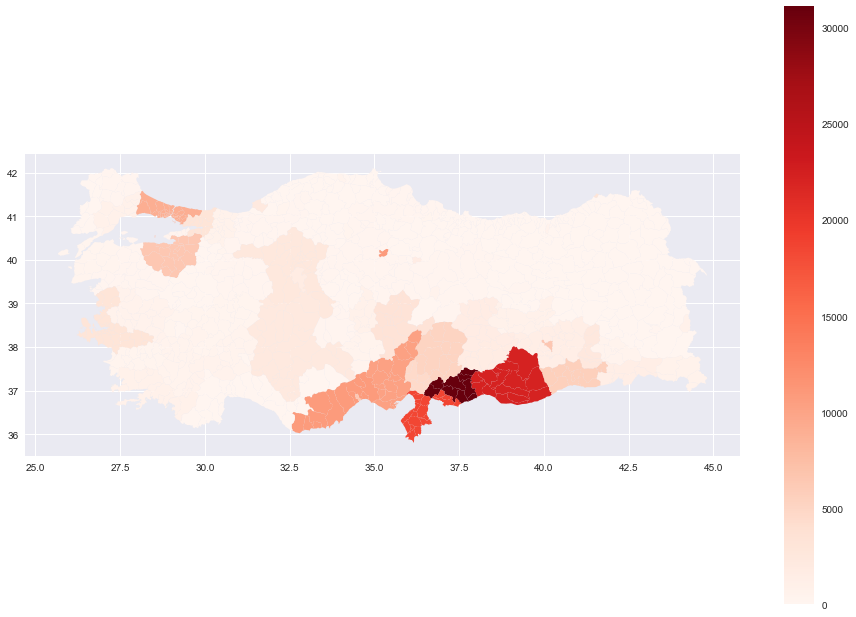

In [12]:
import pandas as pd
df_initPop1 = pd.read_csv('data/turkey/InitPopx650.csv')
print(df_initPop1)
df_merge_initPop  = df2.merge(df_initPop1, on='Region', how='left')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()
df_merge_initPop.plot(ax=ax, column='InitPop',cmap='Reds', legend=True)

## Top 10 most routes of refugee flow in Turkey after 40 days
### A route consists of the origin location at the begining of the simulation and the location at the end of the simulation

### The green dot represents the origin location, the red dot represents the destiny location

In [13]:
df_routes = pd.read_csv('data/Routesadm2.RefModelData.x650.40.csv')
df_routes = df_routes[df_routes.Number > 0]
df_routes = df_routes[df_routes.Origin != df_routes.Destination]
top_20_routes = df_routes.nlargest(10, 'Number').reset_index()
top_20_routes

,index,Origin,Destination,Number
0,98,HATAY,GAZIANTEP,110001
1,179,SANLIURFA,GAZIANTEP,66600
2,120,KILIS,GAZIANTEP,51156
3,150,MARDIN,BATMAN,25429
4,169,OSMANIYE,GAZIANTEP,17342
5,136,KONYA,ANKARA,14594
6,119,KAYSERI,ADANA,13520
7,132,KOCAELI,ISTANBUL,9235
8,110,KAHRAMANMARAS,GAZIANTEP,9105
9,172,OSMANIYE,ADANA,8406


### Top 20 most routes of refugee flow in Turkey after 20 days
### A route consists of the origin location at the begining of the simulation and the location at the end of the simulation

### The red dots represents the origin locations, the green dots represent the destiny locations

In [14]:
df2 = gpd.read_file('data/turkey_districts_1.geojson')
df2.rename(columns = {'adm1_en':'Region'}, inplace = True)


C:\Users\vivia\AppData\Local\Temp\ipykernel_17644\415153365.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Origin]
C:\Users\vivia\AppData\Local\Temp\ipykernel_17644\415153365.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Origin]
C:\Users\vivia\AppData\Local\Temp\ipykernel_17644\415153365.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_values_destinations =  [df2.loc[

[36    36.427194
dtype: float64, 67    37.245669
dtype: float64, 47    36.800753
dtype: float64, 56    37.343092
dtype: float64, 63    37.276656
dtype: float64, 52    38.037389
dtype: float64, 46    38.608137
dtype: float64, 51    40.848643
dtype: float64, 41    37.890889
dtype: float64, 63    37.276656
dtype: float64]
[Empty GeoDataFrame
Columns: [adm1_tr, Region, adm1, Shape_Leng, Shape_Area, adm0_en, adm0_tr, adm0, geometry]
Index: []]


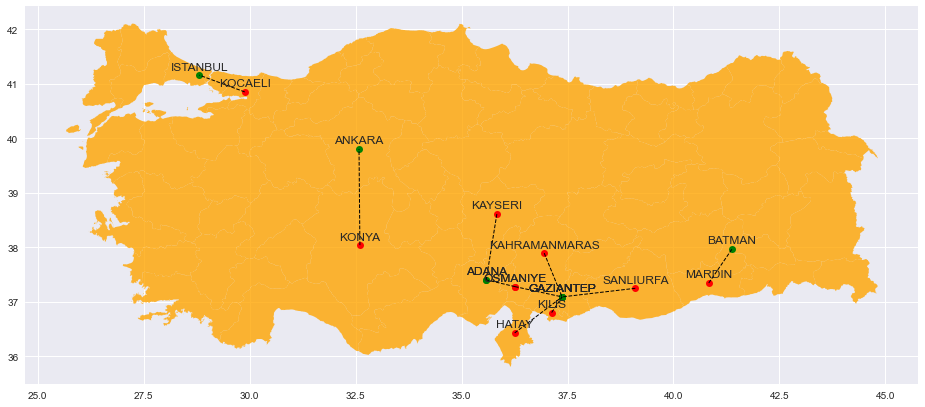

In [15]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()
df2.plot(ax=ax, color='orange', alpha=0.8)



x_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Origin]
y_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Origin]
names_origins = [i for i in top_20_routes.Origin]

x_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Destination]
y_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Destination]
names_destinations = [i for i in top_20_routes.Destination]
print(y_values_origins)
print([df2.loc[df2['Region'] == 'Belen']])

for i, j, l in zip(x_values_origins, y_values_origins, names_origins):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "red",
        alpha = 1.0
        )


for i, j, l in zip(x_values_destinations, y_values_destinations, names_destinations):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "green",
        alpha = 1.0
        )



for i, j, l, t in zip(x_values_origins, x_values_destinations, y_values_origins, y_values_destinations):
    plt.plot([i,j], [l,t], linewidth = 1, linestyle = "--", color = "black")


In [16]:
#fig.savefig('model_out_40')